<h1>Scikit-learn: kNN Classification</h2>
<p><img id="19913094" src="images/1line.png" width="100%"  /></p>
<ul>
<li>Scikit-learn is a very popular Machine Learning library for Python.</li>
<li>The The Scikit-learn (sklearn) library has a pre-built kNN classifier we will use to classify a dataset.</li>
</ul>
<h3 id="the-dataset">The Dataset</h3>
<ul>
<li class="p-margin">To illustrate the kNN algorithm, let's work on a dataset commonly used to teach kNN classification: The Iris dataset.</li>
<li>As on prior projects, we will import numpy, pandas and matplotlib.pyplot.</li>
<li>We will import several packages from scikit-learn as we need them.</li>
<li>We will also load the iris.csv dataset using read_csv.</li>
</ul>

In [28]:
# Import packages and load data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("data/iris.csv")
df.head()

,id,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,1,5.1,3.5,1.4,0.2,0,setosa
1,2,4.9,3.0,1.4,0.2,0,setosa
2,3,4.7,3.2,1.3,0.2,0,setosa
3,4,4.6,3.1,1.5,0.2,0,setosa
4,5,5.0,3.6,1.4,0.2,0,setosa


<h3>The Process</h3>
<ul>
<li class="p-margin">To fit and train this model, we&rsquo;ll be following The Machine Learning Process&nbsp;discussed in the <a title="Machine Learning" href="https://ucdenver.instructure.com/courses/518274/pages/machine-learning-2" data-api-endpoint="https://ucdenver.instructure.com/api/v1/courses/518274/pages/machine-learning-2" data-api-returntype="Page">Machine Learning</a> lecture. However, as our the Iris data is pretty clean, we won&rsquo;t carry out every step. We will do the following:</li>
</ul>
<ul>
<li style="list-style-type: none;">
<ul>
<li aria-level="1">Feature engineering</li>
<li aria-level="1">Split the data</li>
<li aria-level="1">Train the model</li>
<li aria-level="1">Hyperparameter tuning</li>
<li aria-level="1">Assess performance</li>
</ul>
</li>
</ul>

<h3>Visualizing the Data</h3>
<ul>
<li>An early step in any effort to analyze or model data should be to understand how the variables are distributed.</li>
<li>Visualizing a classification data set can be challenging because we are interested in understanding the shape and spread of many different data points and their relationships to each other</li>
<li>For the Iris dataset we are most interested in comparing the shape of the Sepal and the shape of the Petal for the three different varieties of flowers.</li>
<li>I am using Matplotlib sub plots to plot Sepal and Petal lengths vs. widths side by side with different colors and markers for the three different varieties of irises.</li>
<li>What these visualizations show us is that, there are clear differences between this data for the different varieties of irises - which is why this dataset is frequently used to teach classification!</li>
</ul>

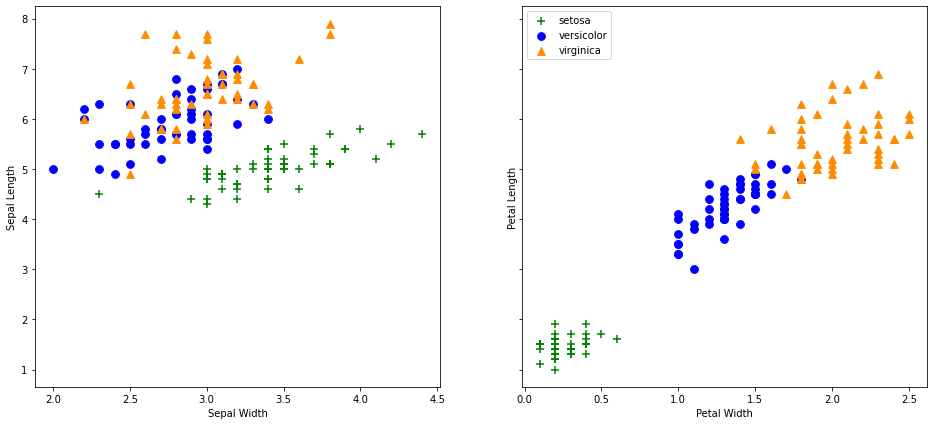

In [29]:
# Plot data for the three diffeent Iris varieties using Matplotlib (esier to set color, marker & legend)
df0 = df[df["target"]==0] # setosa
df1 = df[df["target"]==1] # versicolor
df2 = df[df["target"]==2] # virginica

fig, axs = plt.subplots(1, 2, figsize=(16, 7), sharey=True)

# Plot Sepal Length vs. Width for the three diffeent Iris varieties
axs[0].set_ylabel('Sepal Length')
axs[0].set_xlabel('Sepal Width')
axs[0].scatter(df0['sepal width (cm)'], df0['sepal length (cm)'], color="green", marker='+', label='setosa', s=60)
axs[0].scatter(df1['sepal width (cm)'], df1['sepal length (cm)'], color="blue", marker='o', label='versicolor', s=60)
axs[0].scatter(df2['sepal width (cm)'], df2['sepal length (cm)'], color="darkorange", marker='^', label='virginica', s=60)
# axs[0].legend(loc="lower right")

# Plot Petal Length vs. Width for the three different Iris varieties
axs[1].set_ylabel('Petal Length')
axs[1].set_xlabel('Petal Width')
axs[1].scatter(df0['petal width (cm)'], df0['petal length (cm)'], color="green", marker='+', label='setosa', s=60)
axs[1].scatter(df1['petal width (cm)'], df1['petal length (cm)'], color="blue", marker='o', label='versicolor', s=60)
axs[1].scatter(df2['petal width (cm)'], df2['petal length (cm)'], color="darkorange", marker='^', label='virginica', s=60)
axs[1].legend(loc="upper left")

plt.show()

<h3>Feature Engineering</h3>

<h4>Split the Data</h4>
<ul>
<li>When classifying data it is important to have unknown data points to test the performance of the classifier rather than testing with the same points the model was trained with.<br /><img style="max-width: 500px;" src="images/training_testing.png" alt="Training Data Set -&gt; Test Data Set"  /></li>
<li>The data should be split randomly, to do this we import <code>train_test_split</code> from <code>sklearn.model_selection</code></li>
<li>We need to have the <code>data</code> (used for classification) and the <code>target</code> (to be classified) in separate variables - so we drop both the "target" and the "species" columns (axis=1) from our dataframe and extract the "target" column by itself into a Pandas Series.</li>
<li>Then we pass the <code>data</code> and the <code>target</code> to <code>train_test_split</code> and we specify what percent of the data we want to hold out for testing (0.40)</li>
<li>The <code>train_test_split</code> method returns four sets of data the data_training, data_testing, target_training, and the target_testing.</li>
</ul>
<h4>Normalize the Data</h4>
<ul>
<li>When training a kNN classifier, it is also essential to normalize the features. This is because kNN measures the distance between points.</li>
<li>Most datasets involve data with very different scales and if we didn&rsquo;t normalize, the calculation would be heavily weighted towards features with larger values.</li><li>We normalize the data after splitting it into training and test sets. This helps prevent ‘data leakage’ as the normalization would give the model additional information about the test set if we normalized all the data at once.</li>
</ul>
<p>&nbsp;</p>

In [37]:
# Preparing the data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Let's create df and series for features and target
df_data = df.drop(['target','species'],axis=1)
series_target = df['target']


# Splitting training and test datasets
data_train, data_test, target_train, target_test = train_test_split(df_data, series_target, test_size=0.30)

# Scale the features using StandardScaler
scaler = StandardScaler()
data_train = scaler.fit_transform(data_train)
data_test = scaler.transform(data_test)


<h3>Training the Model</h3>
<ul>
<li>We first create an instance of the kNN model, then fit this to our training data.</li>
<li>We pass both the features and the target variable, so the model can learn.</li>
<li>We need provide the model&nbsp; an initial value for k (n_neighbors).</li>
<li>We will start with a <code>n_neighbors=3</code> but this can be optimized as a part of an iterative tuning of the model.<br /><br /></li>
</ul>

In [31]:
# Fit the kNN model
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(3)
knn.fit(data_train, target_train)


KNeighborsClassifier(n_neighbors=3)

<h3>Testing the Model</h3>
<ul>
<li>Once the model is trained it can be used to make predictions on the test dataset using the predict method of the knn object.</li>
<li>The predictions for each "unknown" test sample is stored in the <code>pred</code> variable.</li>
<li>This returns an array of predicted class labels for each sample in X_test.</li>
<li>The <code>pred</code> variable can be used to evaluate the performance of the kNN classifier by comparing it to the actual targets for the test dataset (<code>target_test</code>).</li>
</ul>

In [32]:
# Predicting the test targets
pred = knn.predict(data_test)

<h3>Assess Performance</h3>
<ul>
<li>The simplest way to evaluate this model is by using accuracy.</li>
<li>The accuracy methods checks the predictions against the actual values in the test set and count up how many the model got right.</li>
<li>The accuracy <span class="listed-menu css-wowgm9-RichText">score is 1.0 which means every prediction was correct! </span></li>
<li>Since it is not possible to improve this model's performance, we will skip the iterative model tuning step that would optimize the value of<strong> k</strong>. </li>
<li>We will also skip other performance metrics as they typically just provide detail on the types of errors in the model.<br /></li>
</ul>

In [33]:
# Assess the model using Accuracy Score
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(target_test, pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


<h3>Tune the Model</h3>
<ul><li>To find the best value for k have to loop through many different values, then select the value that provides the best model performance.</li>
<li>We typically only check odd values of k because even values have the risk of a "tie" score for the nearest neighbor count</li>
<li>We then plot the accuracy scores vs. the k values to find the best value for k</li>
</ul>


In [34]:
#Choosing the best value for k based on the accuracy score

accuracy = []
kmax=75
# Test odd numbers between 1 and kmax, odd so no possible "ties" in knn test
for k in range(1,kmax, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(data_train,target_train)
    pred = knn.predict(data_test)
    accuracy.append(accuracy_score(target_test, pred))


Text(0, 0.5, 'Accuracy Score')

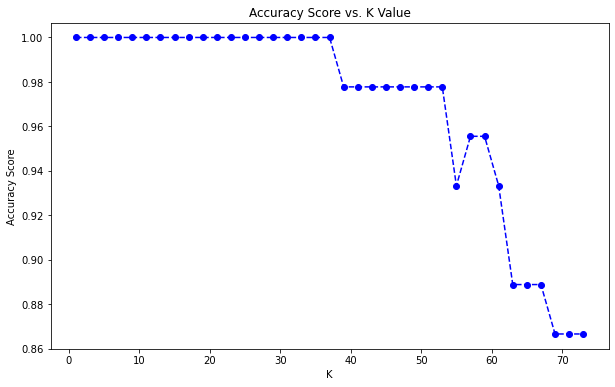

In [35]:
plt.figure(figsize=(10,6))
plt.plot(range(1,kmax, 2), accuracy,color='blue', linestyle='--', marker='o', markersize=6)
plt.title('Accuracy Score vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Score')

<h3>Assess Performance (again)</h3>

In [36]:
from sklearn.metrics import classification_report

knn = KNeighborsClassifier(n_neighbors=45)
knn.fit(data_train,target_train)

pred = knn.predict(data_test)
print(classification_report(target_test,pred))
print(accuracy_score(target_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      1.00      0.97        16
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

0.9777777777777777



<hr />
<h3>References</h3>
<ul>
<li>Mike Yun, Iris KNN Classification (SciKit), <a href="https://www.kaggle.com/code/barcodereader/iris-knn-classification-scikit">https://www.kaggle.com/code/barcodereader/iris-knn-classification-scikit</a>, Apache 2.0 open source license.</li>
<li>skalskip, Iris data visualization and KNN classification <a href="https://www.kaggle.com/code/skalskip/iris-data-visualization-and-knn-classification">https://www.kaggle.com/code/skalskip/iris-data-visualization-and-knn-classification</a>, Apache 2.0 open source license.</li>
<li>Images downloaded from: <a href="https://github.com/andersonpereiradossantos/machine-leaning-knn_Iris_dataset">https://github.com/andersonpereiradossantos/machine-leaning-knn_Iris_dataset</a>, MIT License</li>
<li>K-Nearest Neighbors (KNN) Classification with scikit-learn, Feb 2023, <a href="https://www.datacamp.com/tutorial/k-nearest-neighbor-classification-scikit-learn" target="_blank" rel="noopener">https://www.datacamp.com/tutorial/k-nearest-neighbor-classification-scikit-learn</a> </li>
<li>Harshil Patel, What is Feature Engineering &mdash; Importance, Tools and Techniques for Machine Learning, Towards Data Science, <a href="https://towardsdatascience.com/what-is-feature-engineering-importance-tools-and-techniques-for-machine-learning-2080b0269f10" target="_blank" rel="noopener">https://towardsdatascience.com/what-is-feature-engineering-importance-tools-and-techniques-for-machine-learning-2080b0269f10</a></li></ul>